In [13]:
import pandas as pd

Note:

<h4>PAM Method = Partition Around Medoids.</h4>

The Difference:

K-Means - Pick up Centroids at random.

PAM - Initial Centroids must be around the datapoints.

In [56]:
# In Lab, Take 3 cols, do KMeans, and do viz. with Seaborn.
# If required, go for IRIS dataset.

from sklearn.datasets import load_iris
df = load_iris()

df

# Ignore 'target' for now.

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Step 1: Choose 'k' value. 

# When 'Elbow' Graph does not give accurate 'k', Use 'Silhouette Score'

In [30]:
dataset = data.iloc[:, [3, 4]].values

In [31]:
from sklearn.cluster import KMeans
wcss = []

# Since clustering, no need for train_test split
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataset)
    
    # km.inertia_ is where 'wcss' value is stored
    wcss.append(km.inertia_)
    
# WCSS = Within-Cluster Sum of Squares

In [32]:
import matplotlib.pyplot as plt

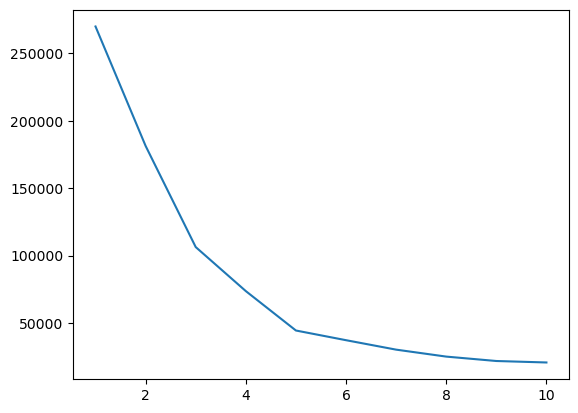

In [33]:
# Elbow Graph
plt.plot(range(1, 11), wcss)

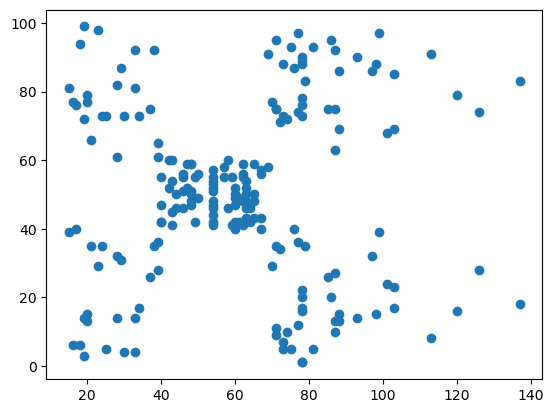

In [34]:
# Visualize Data
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [35]:
# Let 'k' = 5

km = KMeans(n_clusters=5, random_state=0)
y = km.fit_predict(dataset)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

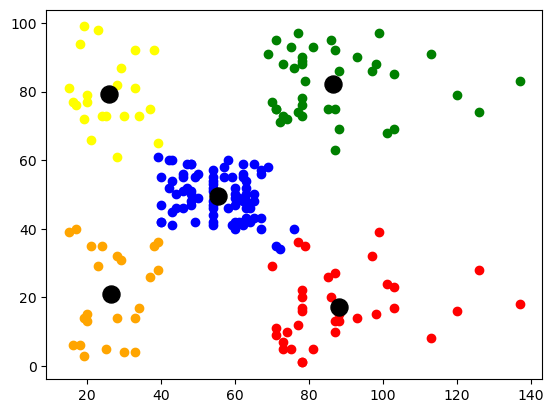

In [50]:
colours = ['red', 'blue', 'green', 'yellow', 'orange']

for i in range(5):
    plt.scatter(dataset[y==i, 0], dataset[y==i, 1], color=colours[i])
    
# To plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', s=150)